In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mlgrad.funcs as funcs
import mlgrad.models as models
import mlgrad.loss as loss

import mlgrad.regr as regr
import mlgrad.af as af

$y=4x-2$

In [2]:
N = 100
X0 = 4*np.random.random(N)-2
Y0 = 4*X0 - 2 + 8*np.random.random(N)-4

Y0_1 = 16*X0
np.putmask(Y0_1, np.abs(X0) < 1.4, 0)
Y0_1 += 8*np.random.random(N)-4

Y1 = Y0 + Y0_1

X1 = X0

linmod = models.LinearModel([-2.,4.])

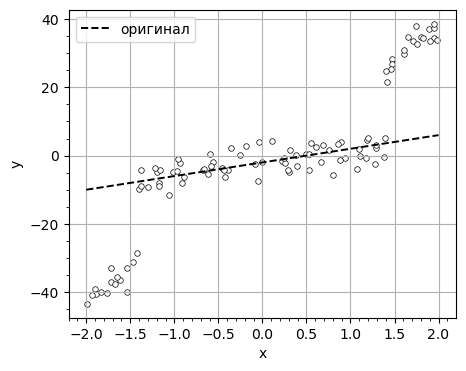

In [3]:
plt.figure(figsize=(5,4))
plt.scatter(X1, Y1, s=16, c='w', edgecolors='k', linewidth=0.5)
plt.plot([-2,2], linmod.evaluate_all([-2,2]), linestyle='--', linewidth=1.4, color='k', label=r'оригинал')
plt.minorticks_on()
plt.legend()
plt.grid(1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

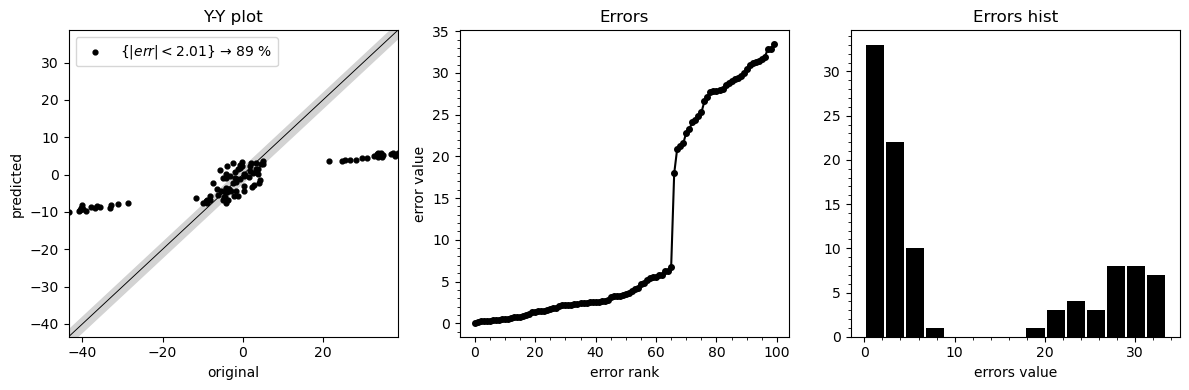

In [4]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
regr.plot_yy(linmod, X1[:,None], Y1, b=2.01)
plt.subplot(1,3,2)
regr.plot_errors(linmod, X1[:,None], Y1)
plt.subplot(1,3,3)
regr.plot_errors_hist(linmod, X1[:,None], Y1, hist=True, bins=15)
plt.tight_layout()
plt.show()

In [5]:
linmod_ols = models.LinearModel(1)
linmod_ols.init_param()
rgr_ols = regr.regression(X1[:,None], Y1, linmod_ols, h=0.1)

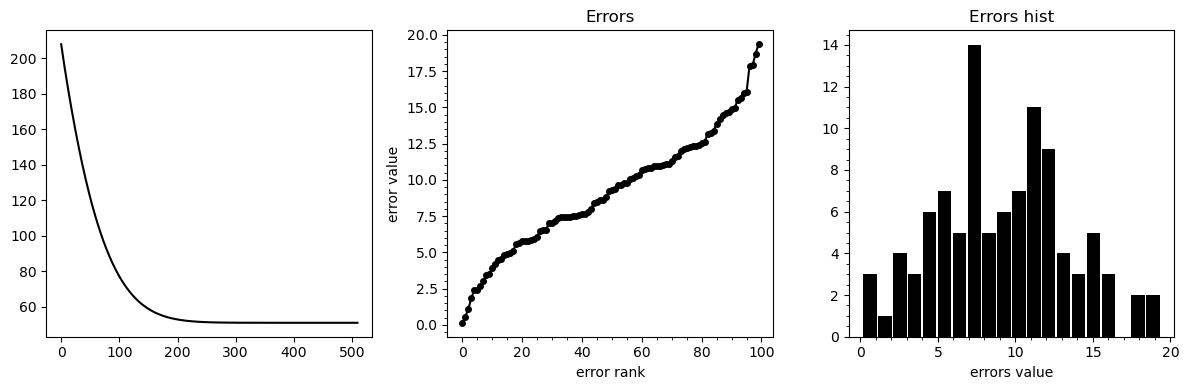

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(rgr_ols.lvals, color='k')
plt.subplot(1,3,2)
regr.plot_errors(linmod_ols, X1[:,None], Y1)
plt.subplot(1,3,3)
regr.plot_errors_hist(linmod_ols, X1[:,None], Y1, hist=True)
plt.tight_layout()
plt.show()

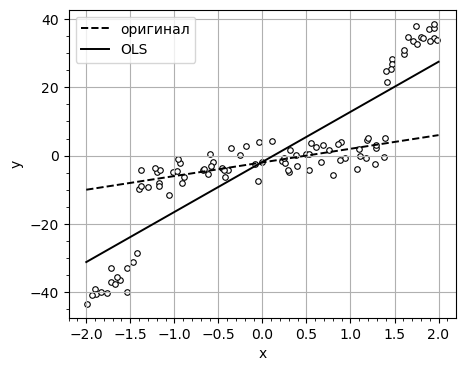

In [7]:
plt.figure(figsize=(5,4))
plt.scatter(X1, Y1, s=16, c='w', edgecolors='k', linewidth=0.8)
plt.plot([-2,2], linmod.evaluate_all([-2,2]), linestyle='--', linewidth=1.4, color='k', label=r'оригинал')
plt.plot([-2,2], linmod_ols.evaluate_all([-2,2]), linewidth=1.4, color='k', label=r'OLS')
plt.minorticks_on()
plt.legend()
plt.grid(1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

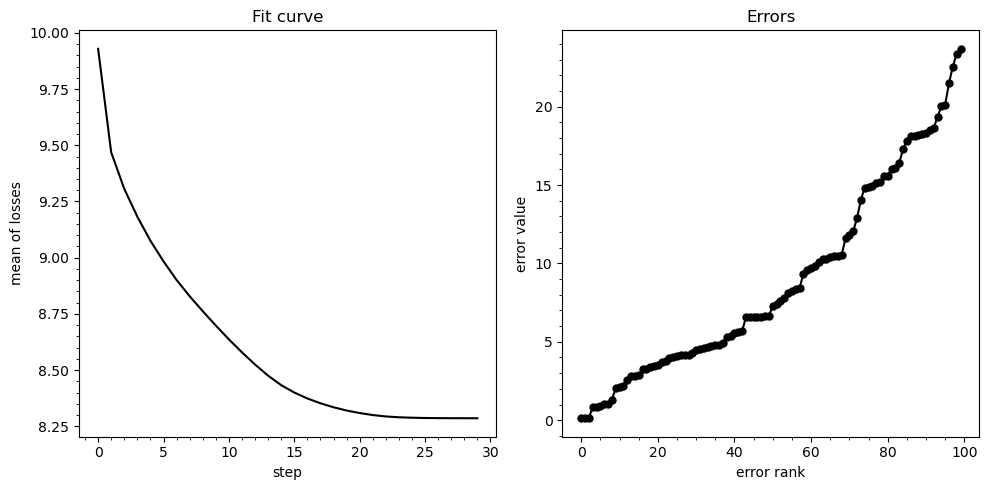

In [8]:
linmod_hub = models.LinearModel(1)
linmod_hub.init_param()
rgr_hub = regr.r_regression_irls(X1[:,None], Y1, linmod_hub, rho_func=funcs.Huber(), h=0.2, n_iter2=100)
regr.plot_losses_and_errors(rgr_hub, X1[:,None], Y1)

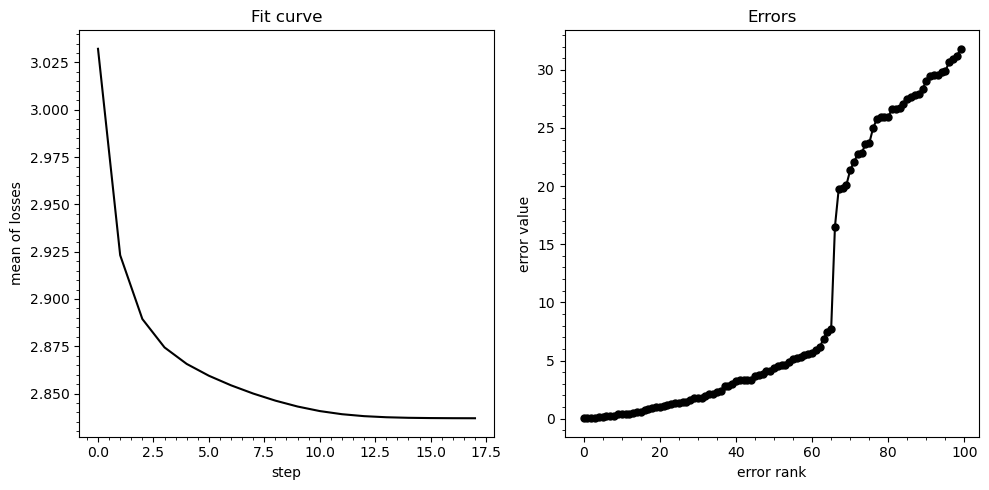

In [9]:
linmod_logsq = models.LinearModel(1)
linmod_logsq.init_param()
rgr_logsq = regr.r_regression_irls(X1[:,None], Y1, linmod_logsq, rho_func=funcs.LogSquare(), h=0.2, n_iter2=100)
regr.plot_losses_and_errors(rgr_logsq, X1[:,None], Y1)

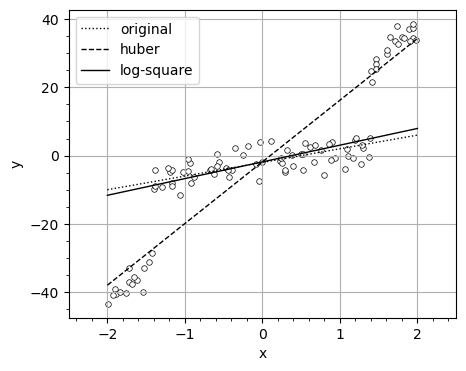

In [10]:
plt.figure(figsize=(5,4))
# plt.subplot(1,2,1)
# plt.title("30% выбросов")
plt.scatter(X1, Y1, s=16, c='w', edgecolors='k', linewidth=0.5)
plt.plot([-2,2], linmod.evaluate_all([-2,2]), linestyle=':', linewidth=1., color='k', label='original')
plt.plot([-2,2], linmod_hub.evaluate_all([-2,2]), linestyle='--', linewidth=1., color='k', label='huber')
# plt.plot([-2,2], linmod_tuk.evaluate_all([-2,2]), linestyle='-.', linewidth=1., color='k', label='tukey')
plt.plot([-2,2], linmod_logsq.evaluate_all([-2,2]), linewidth=1., color='k', label='log-square')
plt.minorticks_on()
plt.legend()
plt.grid(1)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2.5,2.5)
# plt.savefig('fig/simple_linear_regression_rob_class.eps')
plt.show()

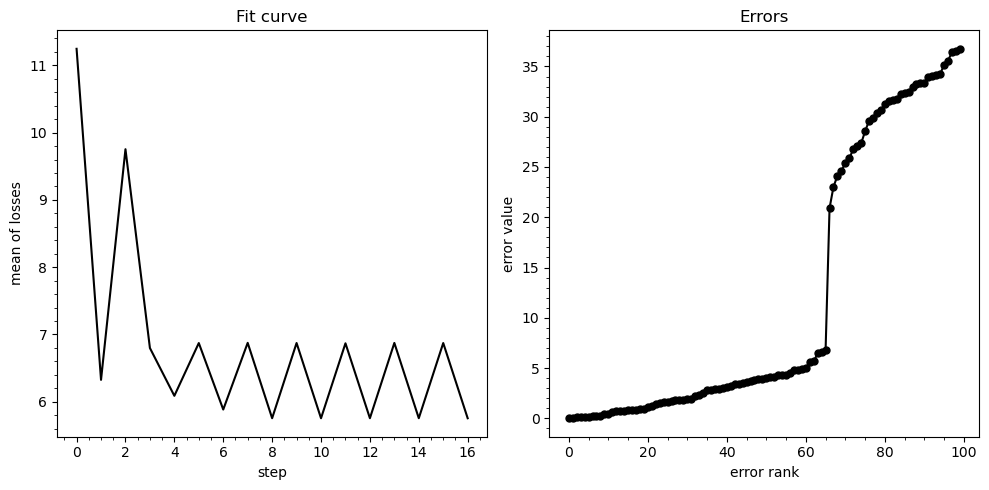

In [11]:
linmod_wm = models.LinearModel(1)
linmod_wm.init_param()
aggfunc = af.averaging_function("WM", rhofunc=funcs.QuantileFunc(0.55, funcs.Sqrt(0.001)))
rgr_wm = regr.m_regression_irls(X1[:,None], Y1, linmod_wm, agg_func=aggfunc, h=0.01)
regr.plot_losses_and_errors(rgr_wm, X1[:,None], Y1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


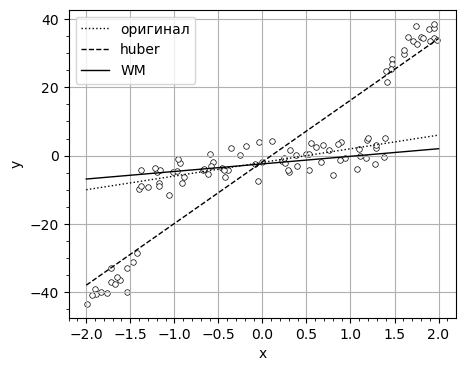

In [12]:
plt.figure(figsize=(5,4))
plt.scatter(X1, Y1, s=16, c='w', edgecolors='k', linewidth=0.5)
plt.plot([-2,2], linmod.evaluate_all([-2,2]), linestyle=':', linewidth=1, color='k', label=r'оригинал')
plt.plot([-2,2], linmod_hub.evaluate_all([-2,2]), linestyle='--', linewidth=1., color='k', label='huber')
plt.plot([-2,2], linmod_wm.evaluate_all([-2,2]), linewidth=1., color='k', label='WM')
plt.minorticks_on()
plt.legend()
plt.grid(1)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('fig/simple_linear_regression_robust.eps')
plt.show()

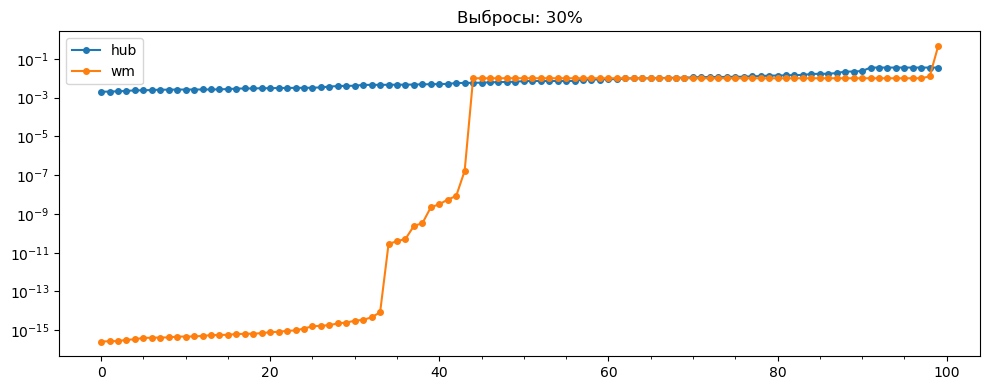

In [13]:
V1_1 = np.array(rgr_hub.weights.weights)
V1_2 = np.array(rgr_wm.weights.weights)

plt.figure(figsize=(10,4))
plt.title('Выбросы: 30%')
plt.plot(sorted(V1_1), marker='o', markersize=4, label='hub')
plt.plot(sorted(V1_2), marker='o', markersize=4, label='wm')
plt.minorticks_on()
plt.gca().set_yscale('log')
plt.tight_layout()
plt.legend()
plt.show()

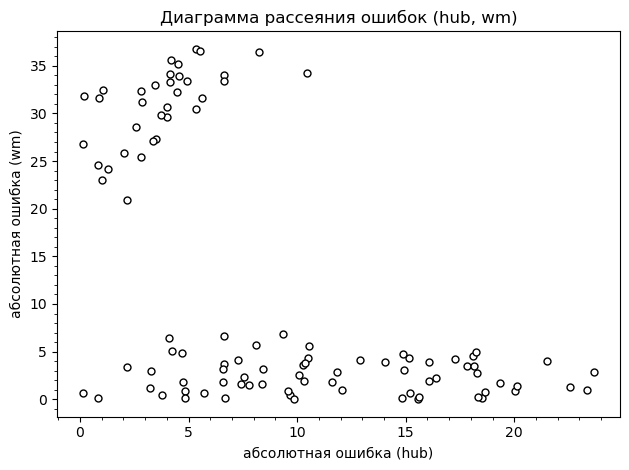

In [14]:
errs1 = np.abs(linmod_hub.evaluate_all(X1[:,None]) - Y1)
errs2 = np.abs(linmod_wm.evaluate_all(X1[:,None]) - Y1)
plt.title('Диаграмма рассеяния ошибок (hub, wm)')
plt.scatter(errs1, errs2, s=25, c='w', edgecolors='k')
plt.savefig('fig/simple_linear_regression_errs_roberrs.eps')
plt.xlabel('абсолютная ошибка (hub)')
plt.ylabel('абсолютная ошибка (wm)')
plt.minorticks_on()
plt.tight_layout()

plt.show()

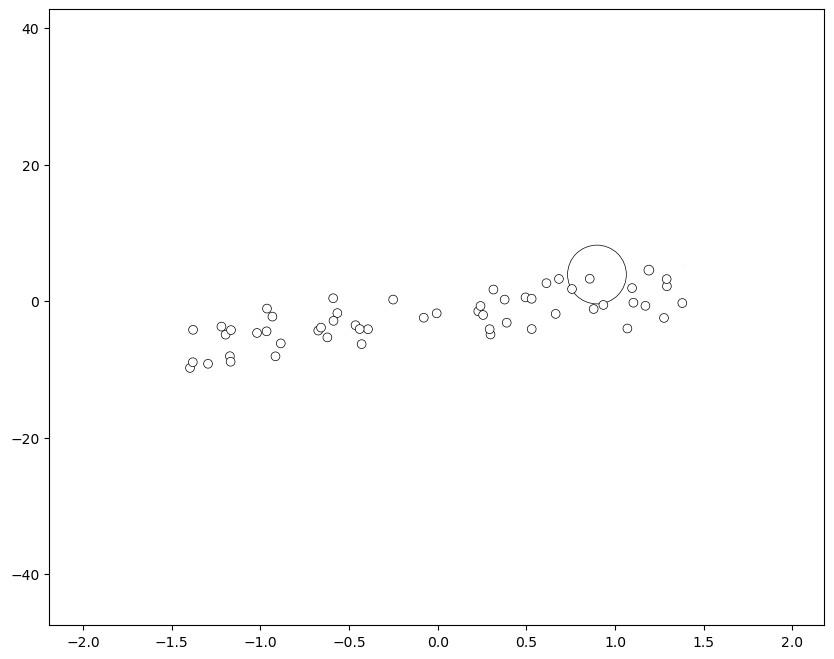

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(X1, Y1, s=4000.*V1_2, c='w', edgecolors='k', linewidth=0.5)
plt.show()